## Embedding in $d=2$, cycling network

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from neurodyn import *
from utils import *

In [3]:
F, G = make_F_G_valentin(p=2, N=20_000, phi=sigmoid)
phi = sigmoid
I_ext = lambda t: 0

## Sanity checks

simulation time: 100.00%|██████████| t=40.000 of 40 [00:03<00:00]


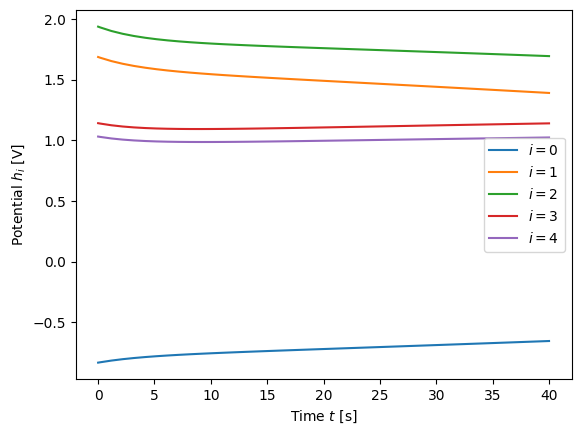

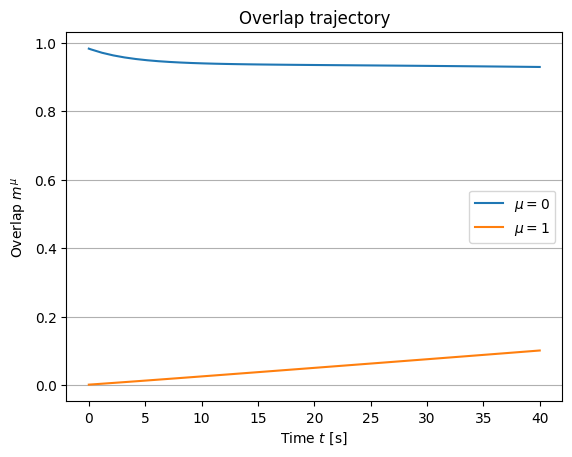

In [4]:
rnn = LowRankRNN(F, G, phi, I_ext)
res = rnn.simulate_h(rnn.F[:, 0], (0, 40), dt_max=1, progress=True)
plot_neuron_trajectory(res);
plot_overlap_trajectory(rnn, res);

simulation time: 100.00%|██████████| t=40.000 of 40 [00:06<00:00]


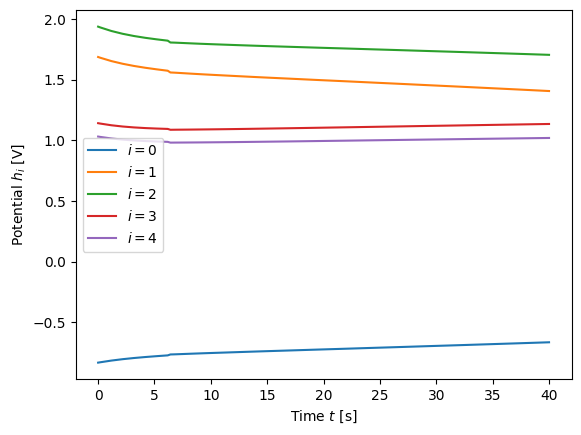

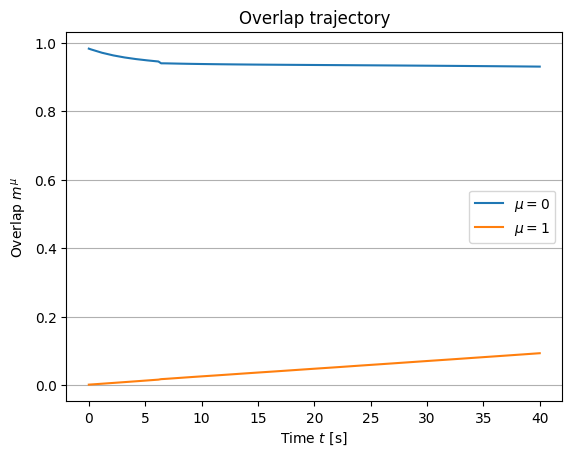

In [5]:
rnn = LowRankCyclingRNN(F, G, phi, I_ext, delta=0, shift=0)
res = rnn.simulate_h(rnn.F[:, 0], (0, 40), dt_max=1, progress=True)
plot_neuron_trajectory(res);
plot_overlap_trajectory(rnn, res);

simulation time: 100.00%|██████████| t=40.000 of 40 [00:11<00:00]


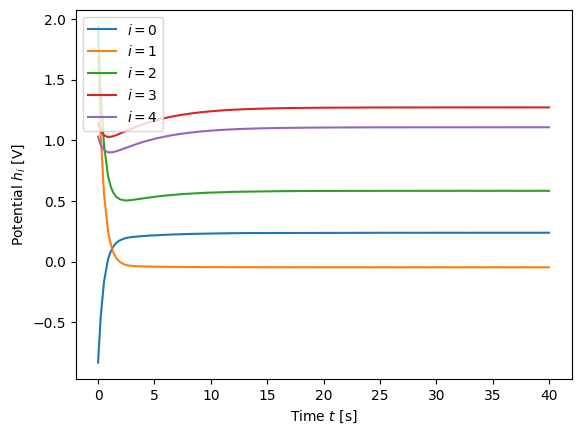

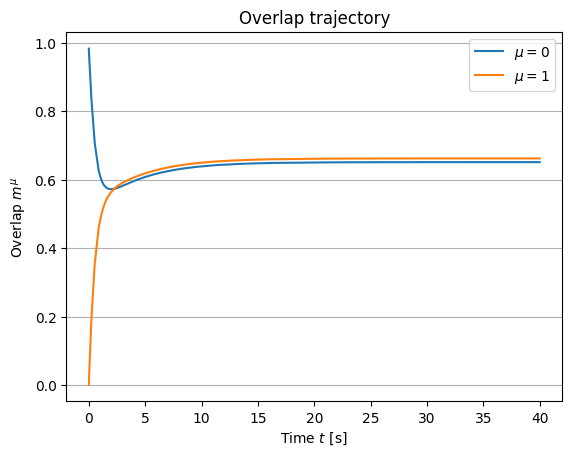

In [6]:
rnn = LowRankCyclingRNN(F, G, phi, I_ext, delta=0, shift=1)
res = rnn.simulate_h(rnn.F[:, 0], (0, 40), dt_max=1, progress=True)
plot_neuron_trajectory(res);
plot_overlap_trajectory(rnn, res);

simulation time: 100.00%|██████████| t=40.000 of 40 [00:04<00:00]


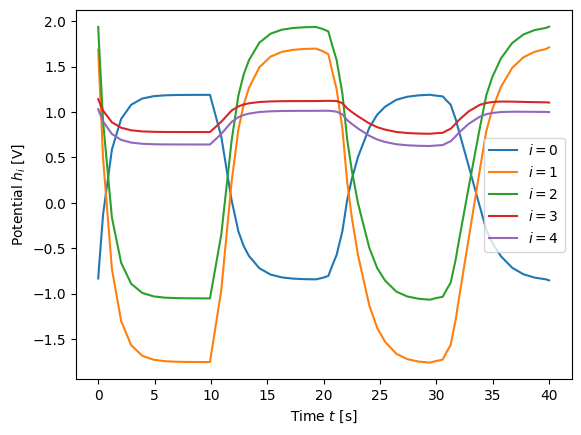

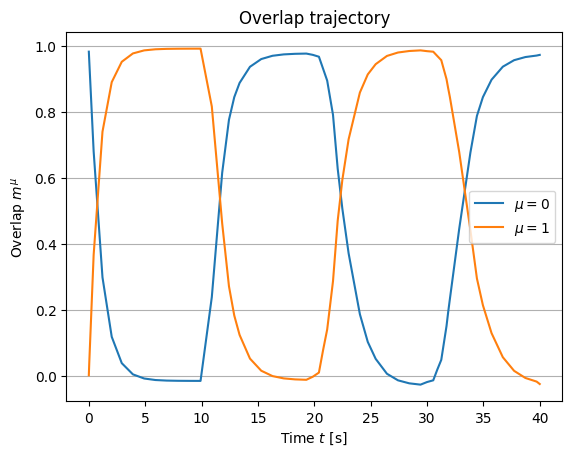

In [7]:
rnn = LowRankCyclingRNN(F, G, phi, I_ext, delta=10, shift=1)
res = rnn.simulate_h(rnn.F[:, 0], (0, 40), dt_max=1, progress=True)
plot_neuron_trajectory(res);
plot_overlap_trajectory(rnn, res);

## Testing different $\delta$ offsets

simulation time: 100.00%|██████████| t=40.000 of 40 [00:05<00:00]


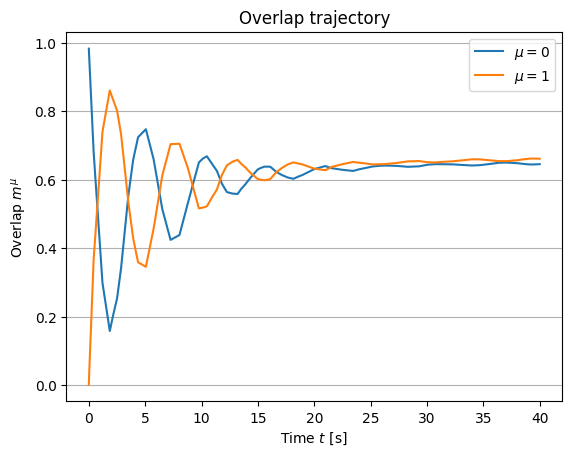

In [8]:
rnn = LowRankCyclingRNN(F, G, phi, I_ext, delta=2)
res = rnn.simulate_h(rnn.F[:, 0], (0, 40), dt_max=1, progress=True)
plot_overlap_trajectory(rnn, res);

simulation time: 100.00%|██████████| t=40.000 of 40 [00:05<00:00]


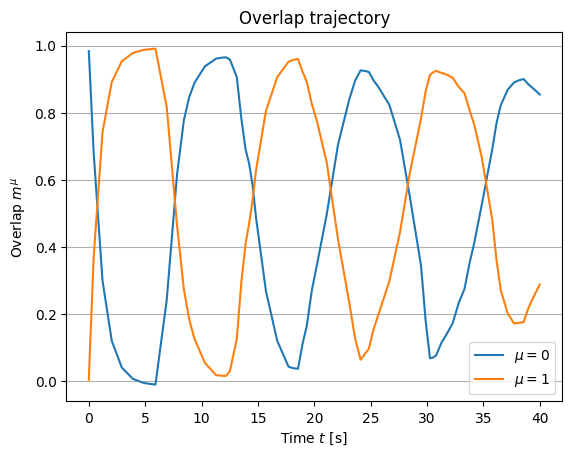

In [9]:
rnn = LowRankCyclingRNN(F, G, phi, I_ext, delta=6)
res = rnn.simulate_h(rnn.F[:, 0], (0, 40), dt_max=1, progress=True)
plot_overlap_trajectory(rnn, res);

simulation time: 100.00%|██████████| t=40.000 of 40 [00:04<00:00]


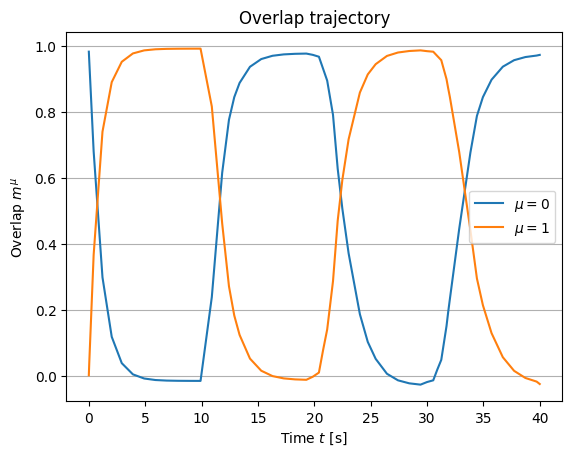

In [10]:
rnn = LowRankCyclingRNN(F, G, phi, I_ext, delta=10)
res = rnn.simulate_h(rnn.F[:, 0], (0, 40), dt_max=1, progress=True)
plot_overlap_trajectory(rnn, res);
# res = rnn.simulate_h(np.concatenate([rnn.F[:rnn.N//2, 0], rnn.F[rnn.N//2:, 1]]), (0, 40), dt_max=1, progress=True)

-> it looks like there is some damping, i.e. we expect the cycling to stop after a while

## Make animations

simulation time: 100.00%|██████████| t=60.000 of 60 [00:15<00:00]


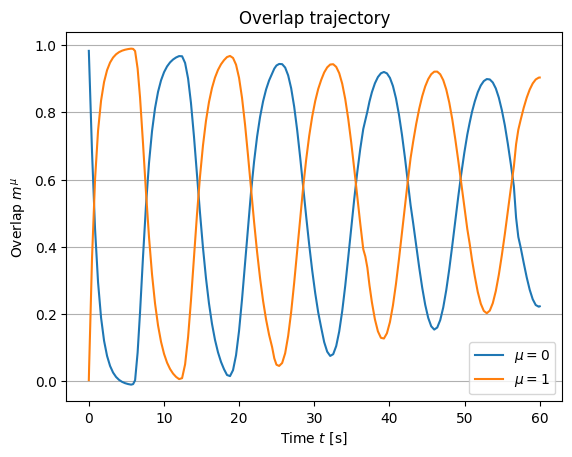

In [11]:
rnn = LowRankCyclingRNN(F, G, phi, I_ext, delta=6)
res = rnn.simulate_h(rnn.F[:, 0], (0, 60), dt_max=0.4, progress=True)
plot_overlap_trajectory(rnn, res);

In [7]:
animate2d(rnn, res, 'animations/embedding_d=2_h0=0_cycling_delta=6.mp4')

157it [12:33,  4.80s/it]                         
